In [1]:
import numpy as np
import matplotlib.pyplot as plt

# PHYS 501 Computation Assignment - Bead on a Spinning Hoop
### Name: Jacob Buchanan

**Part I:** Construct the Lagrangian to describe the system given by Taylor Figure 7.9, and use the Lagrange equations to write the equation of motion for the bead.

## Solution to Part I:

The Lagrangian is defined as

$\mathcal{L}=T-U$.

First, we should find the kinetic energy of the bead. The general form of kinetic energy is

$T=\frac{1}{2}mv^2$.

The velocity has a component along the wire and normal to the wire (due to the spinning of the hoop). The component along the wire is a centripital velocity, so $v=R\dot{\theta}$. The normal component is an angular velocity of the form $v=r\times \omega$. In this case, $r$ is equivalent to $\rho=R\sin{\theta}$. This makes the velocity $v=\rho\omega=R\omega\sin{\theta}$. Combining these gives a kinetic energy

$T=\frac{1}{2}mR^2(\dot{\theta}^2+\omega^2\sin^2{\theta})$.

The potential energy has the form $U=mgh$. In this case, the value of $h$ ranges from $0$ to $R$ and depends on the cosine of $\theta$, or $h=R(1-\cos{\theta})$. This leads to a potential energy

$U=mgR(1-\cos{\theta})$.

Therefore, our Lagrangian for the system is

$$\mathcal{L}=\frac{1}{2}mR^2(\dot{\theta}^2+\omega^2\sin^2{\theta})-mgR(1-\cos{\theta}).$$

The only variable here is $\theta$, so only one Lagrange equation is necessary. That equation,

$$\frac{\delta \mathcal{L}}{\delta \theta}=\frac{d}{dt}\left(\frac{\delta \mathcal{L}}{\delta \dot{\theta}}\right),$$

will give the equation of motion.

Starting with the left derivative,

$$\frac{\delta \mathcal{L}}{\delta \theta}=mR^2\omega^2\sin{\theta}\cos{\theta}-mgR\sin{\theta}.$$

The right side is simpler,

$$\frac{d}{dt}\left(\frac{\delta \mathcal{L}}{\delta \dot{\theta}}\right)=\frac{d}{dt}\left(mR^2\dot{\theta}\right)=mR^2\ddot{\theta}.$$

Combining these gives 

$$mR^2\ddot{\theta}=mR^2\omega^2\sin{\theta}\cos{\theta}-mgR\sin{\theta},$$

which can be simplified to

$$\ddot{\theta}=\omega^2\sin{\theta}\cos{\theta}-\frac{g}{R}\sin{\theta}.$$

**Part II: Write a numerical solution to numerically solve the equation of motion**

In [2]:
# First, define the constants, initial conditions, etc.

speed_0 = 0
# Setting g = 1 for simplicity
g = 1
w = 2
r = 1

# This will be explained later
# But the initial angle is the equilibrium angle plus some displacement
eq = np.arccos(g/(w**2*r))
disp = np.pi/24
theta_0 = eq + disp

# Define the start and stop times, as well as the step between points
start = 0
stop = 10
step = 0.0001

In [3]:
# Define the function for the equation of motion

def f(theta):
    return (w**2*np.sin(theta)*np.cos(theta))-((g/r)*np.sin(theta))

**Euler's Method**

We can write a general 2nd order ODE as

$$\ddot{x}=f(t,x,\dot{x})$$

with initial conditions $x(t_0)=x_0$ and $\dot{x}(t_0)=v_0$. You could rewrite the system as

$$\dot{x}=v$$
$$\dot{v}=f(t,x,v)$$

which is a system of first order equations. To solve this, first define some time step $h$. The following iterative equations can be used to approximate the solution.

$$t_{n+1}=t_n+h$$
$$x_{n+1}=x_n+hv_n$$
$$v_{n+1}=v_n+hf(t_n,x_n,v_n)$$

Let's apply this to the problem at hand!

In [4]:
# Lets define the iterative function

def iterate(t,x,v,h):
    t1 = t + h
    x1 = x + h*v
    v1 = v + h*f(x)
    return t1, x1, v1

In [5]:
# Now we can apply the interative function

# First, initialize the arrays to store the information
theta = [theta_0]
speed = [speed_0]
time = [start]

# Iterate until some stopping condition
while time[-1] < stop:
    it = iterate(time[-1], theta[-1], speed[-1], step)
    time.append(it[0])
    theta.append(it[1])
    speed.append(it[2])

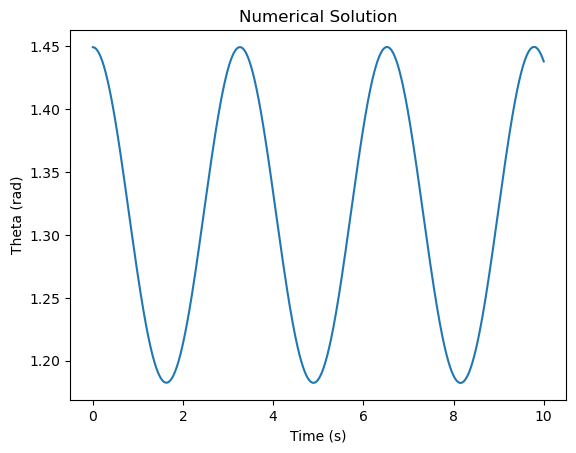

In [6]:
# We have the data now, so let's plot it!
fig = plt.figure()
plt.plot(time, theta)
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Numerical Solution')
plt.show()

**Part IIa**

There is also an approximate solution to the problem, given by

$$\theta(t)=\theta_0+A\cos\left(\Omega't-\delta\right)$$

where

$$\Omega'=\sqrt{\omega^2-\left(\frac{g}{\omega R}\right)^2}$$

and $\theta_0$ is the equilibrium position(s),

$$\theta_0=\pm \arccos\left(\frac{g}{\omega^2 R}\right).$$

We defined the equilibrium position at the beginning of the code and added some displacement to it, so now we can use those values in the approximate solution.

In [7]:
# Define the function
def approx(t):
    o_prime = np.sqrt(w**2-(g/(w*r))**2)
    # Using the equilibrium and displacements defined at the beginning
    return eq+disp*np.cos(o_prime*t)

# Generate the arrays
npoints = 1000
t_approx = np.linspace(start, stop, npoints)
theta_approx = approx(t_approx)

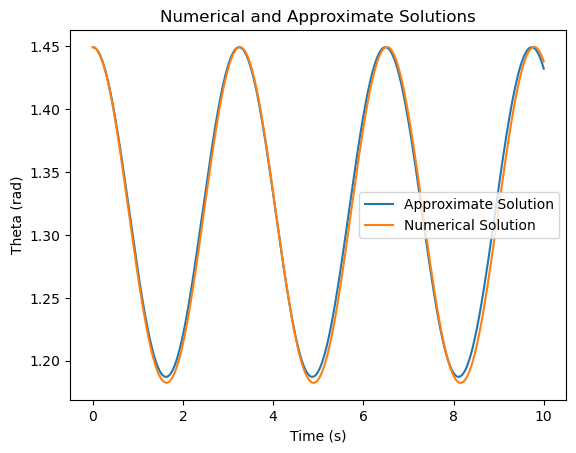

In [8]:
# Plot both now!

fig = plt.figure()
plt.plot(t_approx, theta_approx, label='Approximate Solution')
plt.plot(time, theta, label='Numerical Solution')
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Numerical and Approximate Solutions')
plt.legend()
plt.show()

**Part IIb:** What if we displace the bead 1 degree from equilibrium at t=0? What about 10 degrees?

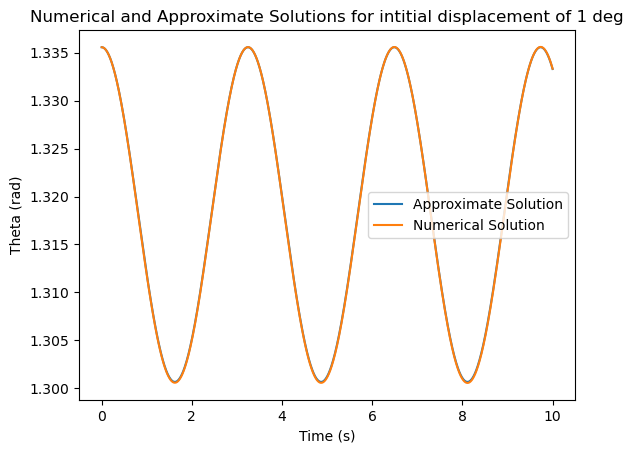

In [9]:
# We can use mostly the same code, so let's do that with a displacement of 1 degree

# Numpy likes radians so convert
disp = np.deg2rad(1)
theta_0 = eq + disp

theta = [theta_0]
speed = [speed_0]
time = [start]

while time[-1] < stop:
    it = iterate(time[-1], theta[-1], speed[-1], step)
    time.append(it[0])
    theta.append(it[1])
    speed.append(it[2])
    
def approx(t):
    o_prime = np.sqrt(w**2-(g/(w*r))**2)
    # Using the equilibrium and displacements defined at the beginning
    return eq+disp*np.cos(o_prime*t)

# Generate the arrays
npoints = 1000
t_approx = np.linspace(start, stop, npoints)
theta_approx = approx(t_approx)

fig = plt.figure()
plt.plot(t_approx, theta_approx, label='Approximate Solution')
plt.plot(time, theta, label='Numerical Solution')
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Numerical and Approximate Solutions for intitial displacement of 1 deg')
plt.legend()
plt.show()

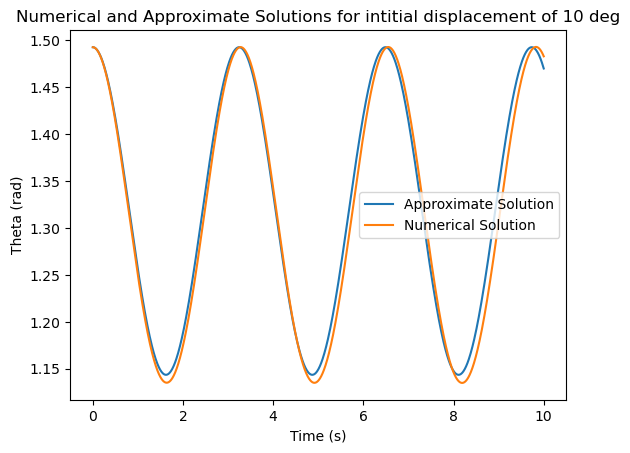

In [10]:
# Now 10 degrees

disp = np.deg2rad(10)
theta_0 = eq + disp

theta = [theta_0]
speed = [speed_0]
time = [start]

while time[-1] < stop:
    it = iterate(time[-1], theta[-1], speed[-1], step)
    time.append(it[0])
    theta.append(it[1])
    speed.append(it[2])
    
def approx(t):
    o_prime = np.sqrt(w**2-(g/(w*r))**2)
    # Using the equilibrium and displacements defined at the beginning
    return eq+disp*np.cos(o_prime*t)

# Generate the arrays
npoints = 1000
t_approx = np.linspace(start, stop, npoints)
theta_approx = approx(t_approx)

fig = plt.figure()
plt.plot(t_approx, theta_approx, label='Approximate Solution')
plt.plot(time, theta, label='Numerical Solution')
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Numerical and Approximate Solutions for intitial displacement of 10 deg')
plt.legend()
plt.show()

**Part III:** Compare the results!

The results here seem sensible. The approximate solution relies on small angles, so a smaller angle like 1 degree should be fairly accurate. As the angle increases, the two methods should differ. The two plots support this theory. The solution does change if you change the equilibrium conditions. The definition is a bit odd thanks to the inverse cosine having a limited domain of $\theta \in [-\pi,\pi]$.